In [2]:
#pip install matplotlib
#pip3 install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [4]:
root_path = '/Users/lpwilson/Ada/Developer/projects/Capstone/EEO1s/'
#read in the long format csv
EEO1_data = pd.read_csv(root_path + 'long_csv.csv')

In [5]:
EEO1_data = pd.DataFrame(EEO1_data)
EEO1_data = EEO1_data.drop(columns = ['Unnamed: 0'])
#EEO1_data.info()
#EEO1_data.head(20)

# goal: 
make a line plot filtered by company and job category that tracks gender (or race) 
as a percentage of total employees in that category over years. 

so, the x-axis points will be the year values
and the y-axis points will be the percentage of employees of each gender.

let's try to get the x- and y- values that we need. 

In [27]:
#set up the filters
company = "Amazon"
#I want to only look at some job categories for now, for readability.
job_cats = ['Exec/Sr. Officials & Mgrs']
job_categories = ['Exec/Sr. Officials & Mgrs','First/Mid Officials & Mgrs','Professionals','Technicians','Sales Workers','Administrative Support','Craft Workers','Operatives','Laborers & Helpers','Service Workers']

#choosing these names to match our queries.
sortBy1 = 'job_category'
sortBy2 = 'gender'

Now let's try to get the y-values for one of the job categories.
we want the sum of count_employees for a given job category and gender.

Let's also filter (query) by the job cats we want.

In [7]:
#can I do the query above and below in one line?
dbl_qry_amz = EEO1_data.query(f"company == '{company}'").query('job_category.isin(@job_cats)').groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'})
dbl_qry_amz = pd.DataFrame(dbl_qry_amz)

([<matplotlib.axis.XTick at 0x11f2cdd80>,
 [Text(2019.0, 0, '2019'), Text(2020.0, 0, '2020'), Text(2021.0, 0, '2021')])

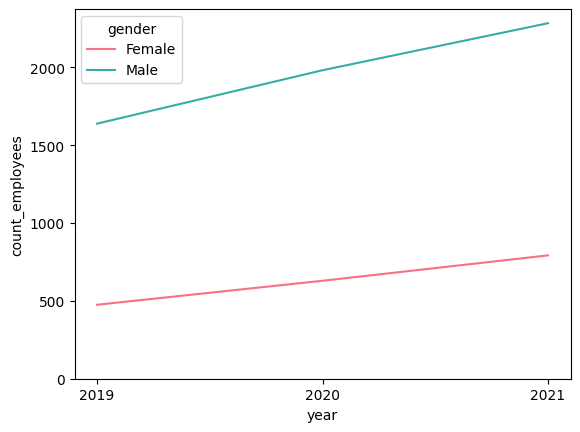

In [8]:
raw_num_plot = sns.lineplot(data = dbl_qry_amz, x='year', y='count_employees', hue = 'gender', palette="husl")
plt.ylim(0)
loc, labels = plt.xticks()
plt.xticks(np.arange(math.ceil(min(loc)), max(loc), step = 1)) #this is my brute force way of getting the ticks to be on whole number years 
#raw_num_plot.set(xticks=[2019, 2020, 2021])

This is a good starting point.

Next:
Graph the percent of females in each field over years?
That would allow us to have more job categories, all on the same graph.

I'm focusing on Amazon because I think that their demographics are the most distorted by different job categories.

In [9]:
perc_qry = dbl_qry_amz.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))

perc_qry

count_employees
year job_category              gender                 
2019 Exec/Sr. Officials & Mgrs Female        22.479886
                               Male          77.520114
2020 Exec/Sr. Officials & Mgrs Female        24.099617
                               Male          75.900383
2021 Exec/Sr. Officials & Mgrs Female        25.756098
                               Male          74.243902

[[<matplotlib.axis.XTick at 0x11f494a00>,

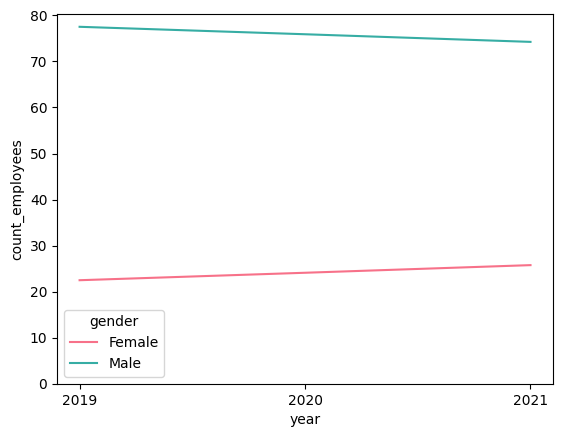

In [10]:
perc_num_plot = sns.lineplot(data = perc_qry, x='year', y='count_employees', hue = 'gender', palette="husl")
plt.ylim(0)
perc_num_plot.set(xticks=[2019, 2020, 2021])

Okay, good so far.
Now, I want to see the graphs of each of the job categories I'm interested in side-by-side. 

There's a way to do this using subplots, I believe.  
For now, though, let's make a helper function to do the above for me.
Inputs: filters and group by's, output: graph of the percentages.

Then, I can use this helper function to make the plots I need for my subplots. (I think.)

In [11]:
def graph_totals(company, job, data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = False):
    """This takes in a company, job categories to show, and fields to filter by (defaulting to job_category and gender)
    and returns a line plot of the employee counts over the available years in the data set."""
    filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"job_category =='{job}'").groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
    if percent == True:
        percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))
        data_to_graph = percs
        plt.ylim(0, 100)
        plt.ylabel(f"Percent of {job} (%)")
        plt.title(f"Percent of {company} {job} by {sortBy2.capitalize()}")
    else:
        data_to_graph = filtered_df
        plt.ylabel(f"Count of {job}")
        plt.title(f"Count of {company} {job} by {sortBy2.capitalize()}")
        
    raw_num_plot = sns.lineplot(data = data_to_graph, x='year', y='count_employees', hue = sortBy2, palette="husl")
    
    loc, labels = plt.xticks()
    plt.xlabel("Year")
    plt.xticks(np.arange(math.ceil(min(loc)), max(loc), step = 1))

    return raw_num_plot


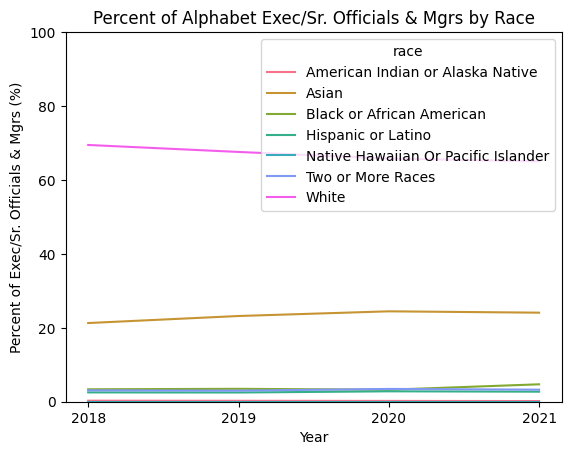

In [12]:
alph_exec_race = graph_totals('Alphabet', 'Exec/Sr. Officials & Mgrs', EEO1_data, sortBy2 = 'race', percent = True)
fig = alph_exec_race.get_figure()
fig.savefig("alph_exec_race")


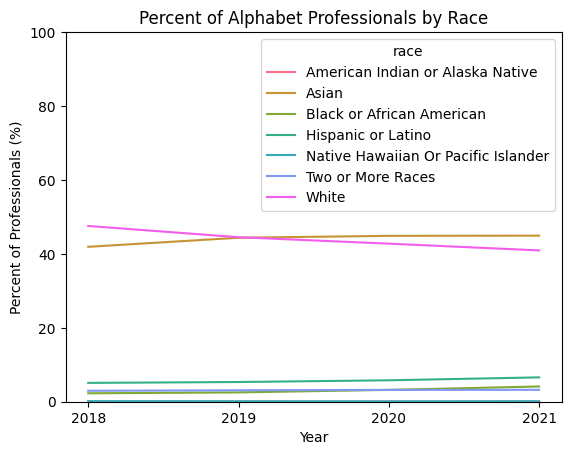

In [13]:
alph_prof_race = graph_totals('Alphabet', 'Professionals', EEO1_data, sortBy2 = 'race', percent = True)
fig = alph_prof_race.get_figure()
fig.savefig("alph_prof_race")

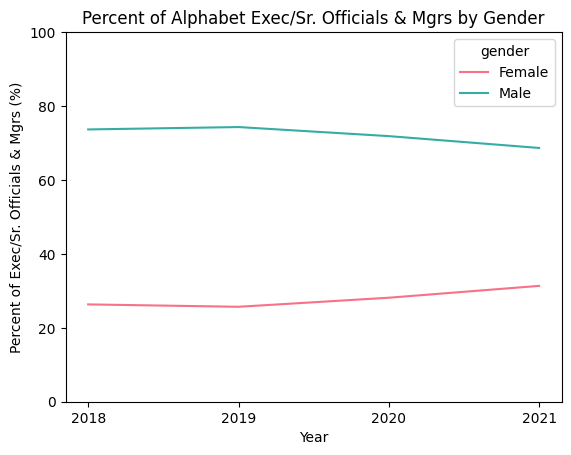

In [14]:
alph_exec_gender= graph_totals('Alphabet', 'Exec/Sr. Officials & Mgrs', EEO1_data, sortBy2 = 'gender', percent = True)
fig = alph_exec_gender.get_figure()
fig.savefig("alph_exec_gender")

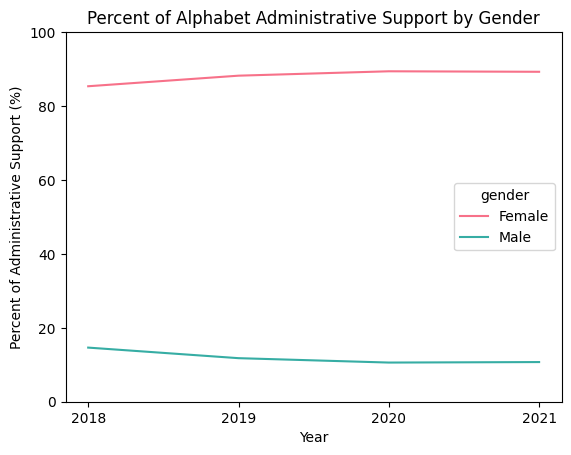

In [15]:
alph_admin_gender = graph_totals('Alphabet', 'Administrative Support', EEO1_data, sortBy2 = 'gender', percent = True)
fig = alph_admin_gender.get_figure()
fig.savefig("alph_admin_gender")

<AxesSubplot: title={'center': 'Count of Alphabet Administrative Support by Gender'}, xlabel='Year', ylabel='Count of Administrative Support'>

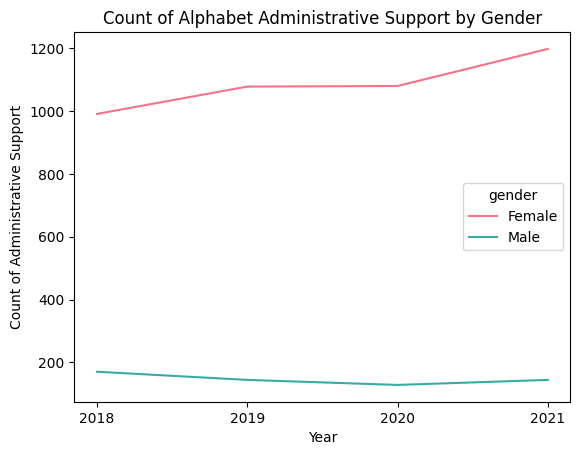

In [16]:
graph_totals('Alphabet', 'Administrative Support', EEO1_data, sortBy2 = 'gender', percent = False)

Goals accomplished:
- make sure y-axis goes to 100 when it's percents.
- make sure y-axis label says percents when it's percents. 
- make a graph title that has the query you used to get it, including company and job category.

I made the function work either with percents or without percents.

next: 

- make title not have list markings around the job category selected.
- let's work on displaying the graphs in subplot form.
- Make this work with multiple job categories selected. (each category would make a new subplot.)
- It would be great if the backend could return these graphs - perhaps they could click on the company, and select the job categories, and it would return it?  stretch goal. 

Let's make a function that graphs the job categories in subplots next to each other.


In [17]:
#THIS REALLY ISN'T WORKING :(  SO SAD.

def graph_totals_mult_jobs(company, job_cats, data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = True):
    """This takes in a company, job categories to show, and fields to filter by (defaulting to job_category and gender)
    and returns a line plot of the employee counts over the available years in the data set."""
    sns.set()
    fig, axes = plt.subplots(1, len(job_cats))

    for ix, job in enumerate(job_cats):
        filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"job_category =='{job}'").groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
        if percent == True:
            percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))
            data_to_graph = percs
            plt.ylim(0, 100)
            plt.ylabel(f"Percent of {job} (%)")
            plt.title(f"Percent of {company} {job} by {sortBy2}")
        else:
            data_to_graph = filtered_df
            plt.ylabel(f"Count of {job}")
            plt.title(f"Count of {company} {job} by {sortBy2}")
        loc, labels = plt.xticks()
        xtics = np.arange(math.ceil(min(loc)), max(loc), step = 1)
        
        
        raw_num_plot = sns.lineplot(data = data_to_graph, x='year', y='count_employees', hue = sortBy2, palette="husl", ax=axes[ix])
    plt.xlabel("Year")
    plt.xticks(xtics)
    plt.show()
        

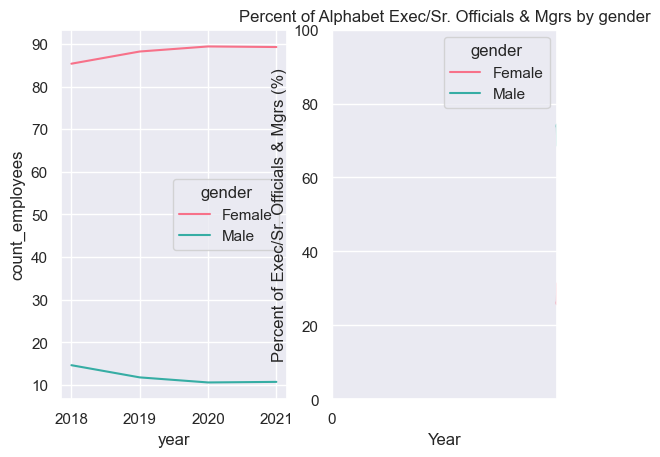

In [18]:
graph_totals_mult_jobs('Alphabet', ['Administrative Support', 'Exec/Sr. Officials & Mgrs'], EEO1_data, sortBy2 = 'gender', percent = True)
#this isn't really working yet, because the labels are all overlapping.  let's just stick with what we have above (for individual graphs), and move on for now. 

Next goal: 
Make a graph that shows what percent of each race is in what job category over time.
so: filter by a single race
and show lines for the percentage of that race that is in each job category. (do for race and gender?)  think about this.

In [19]:
def graph_totals_by_race(company, race, data = EEO1_data, sortBy1 = 'race', sortBy2 = 'job_category', percent = False): #sortby 1 and sort by 2 aren't really customizable tbh. 
    """This takes in a company, race to show, and fields to filter by (defaulting to race and job_category.)
    and returns a line plot of the employee counts over the available years in the data set."""
    filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"race =='{race}'").groupby(["year", sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
    if percent == True:
        percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:100 * x /float(x.sum()))
        data_to_graph = percs
        plt.ylim(0, 100)
        plt.ylabel(f"Percent of {race} (%)")
        plt.title(f"Percent of {company} {race} Employees by {sortBy2}")
    else:
        data_to_graph = filtered_df
        plt.ylabel(f"Count of {race}")
        plt.title(f"Count of {company} {race} Employees by {sortBy2}")
        
    raw_num_plot = sns.lineplot(data = data_to_graph, x='year', y='count_employees', hue = sortBy2)
    
    loc, labels = plt.xticks()
    plt.xlabel("Year")
    plt.xticks(np.arange(math.ceil(min(loc)), max(loc), step = 1))
    return raw_num_plot

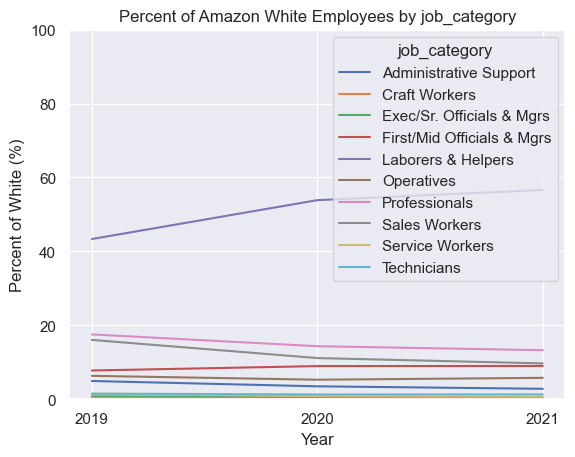

In [20]:
# "Hispanic or Latino"	"White"	"Black or African American"	"Native Hawaiian Or Pacific Islander"	"Asian"	"American Indian or Alaska Native"	"Two or More Races"
amz_white_jobs = graph_totals_by_race("Amazon", "White", EEO1_data, percent = True)
fig = amz_white_jobs.get_figure()
fig.savefig("amz_white_jobs")

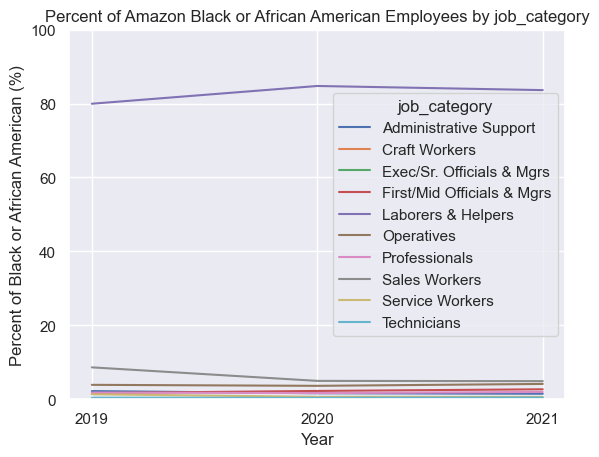

In [21]:
amz_Black_jobs = graph_totals_by_race("Amazon", "Black or African American", EEO1_data, percent = True)
fig = amz_Black_jobs.get_figure()
fig.savefig("amz_Black_jobs")

##this would show well in a pie chart.
#or add a dotted line for company wide averages for each job category.

<AxesSubplot: title={'center': 'Percent of Alphabet White Employees by job_category'}, xlabel='Year', ylabel='Percent of White (%)'>

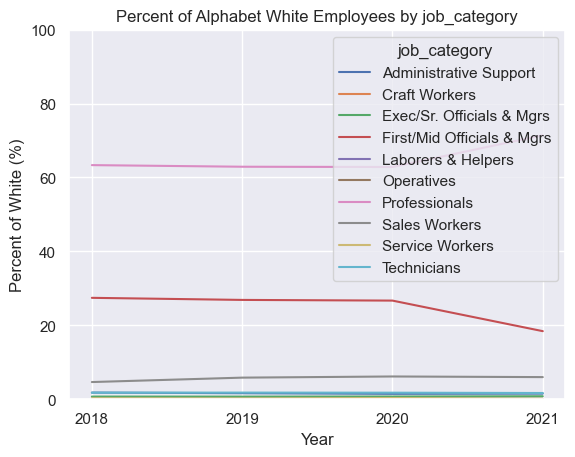

In [22]:
graph_totals_by_race("Alphabet", "White", EEO1_data, percent = True)

<AxesSubplot: title={'center': 'Percent of Alphabet Black or African American Employees by job_category'}, xlabel='Year', ylabel='Percent of Black or African American (%)'>

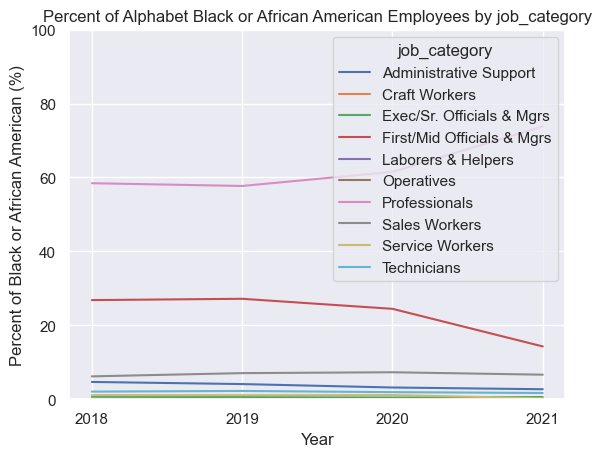

In [23]:
graph_totals_by_race("Alphabet", "Black or African American", EEO1_data, percent = True)

There still is an issue that we don't know how these race numbers compare with the company's numbers as a whole. 
For the graph above, perhaps Google decreased its number of first level managers, while increasing professionals. 

make a super function that can query for race or gender or job category.  use the framework of the functions above.  basically, get it working for gender as well (all these functions are very not DRY.  refactor to make them better.)
(eg: what percent of female employees at amazon work in each job category?)

Another idea: make a loop that goes through each race and prints it's distribution graph.

Next: 
Let's see if we can make a graph that shows people outlines.  for what percent of people are in each job category.

In [43]:
def data_totals(company, job, data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = False):
    """This takes in a company, job categories to show, and fields to filter by (defaulting to job_category and gender)
    and returns a line plot of the employee counts over the available years in the data set."""
    filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"job_category =='{job}'").groupby([sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
    if percent == True:
        percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:(100 * x /float(x.sum())).round())
        data = percs
    else:
        data = filtered_df

    return data

In [44]:
amz_prof_gender = data_totals("Amazon", "Professionals", data = EEO1_data, sortBy1 = 'job_category', sortBy2 = 'gender', percent = True)
amz_prof_gender

count_employees
job_category  gender                 
Professionals Female             31.0
              Male               69.0

In [47]:

job_categories = ['Exec/Sr. Officials & Mgrs','First/Mid Officials & Mgrs','Professionals','Technicians','Sales Workers','Administrative Support','Craft Workers','Operatives','Laborers & Helpers','Service Workers']
amz_gender_data = {}
for job in job_categories:
    file_name = 'amz_' + str(job)[0:4] + '_gender'
    amz_gender_data[file_name] = data_totals("Amazon", job, percent=True)

In [48]:
amz_gender_data['amz_Tech_gender']

count_employees
job_category gender                 
Technicians  Female             19.0
             Male               81.0